In [3]:
import numpy as np
from qutip import Bloch, basis, ket, Qobj
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.rcParams.update({'font.size': 26})


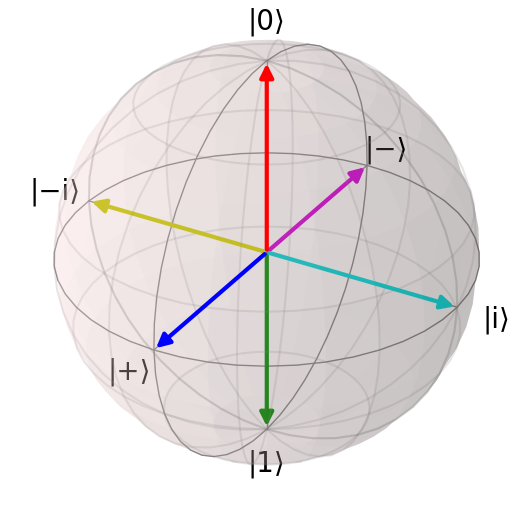

In [4]:
import numpy as np
from qutip import Bloch, basis
import matplotlib.pyplot as plt

def visualize_bloch_states():
    # Define states
    zero = basis(2, 0)            # |0⟩
    one = basis(2, 1)             # |1⟩
    plus = (zero + one).unit()    # |+⟩
    minus = (zero - one).unit()   # |−⟩
    plus_i = (zero + 1j * one).unit()   # |i⟩
    minus_i = (zero - 1j * one).unit()  # |−i⟩

    states = [zero, one, plus, minus, plus_i, minus_i]
    labels = [None, None, "|+⟩", "|−⟩", "|i⟩", "|−i⟩"]  # No labels for |0⟩ and |1⟩

    b = Bloch()
    b.vector_color = ['r', 'g', 'b', 'm', 'c', 'y']

    for state, label in zip(states, labels):
        b.add_states(state)
        # if label:
        #     try:
        #         b.add_annotation(state, label)
        #     except AttributeError:
        #         pass  # Skip if annotation is not supported
    b.zlabel = ['|0⟩','|1⟩']    
    b.xlabel = ['|+⟩','|−⟩']
    b.ylabel = ['|i⟩','|−i⟩']
    b.make_sphere()
    b.show()
    b.save('bloch_states.pdf')
    plt.show()

# Run the function
visualize_bloch_states()


In [6]:
from qutip import basis, Bloch, sigmax, sigmay, sigmaz
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
# params = {'text.usetex' : True,
#           'font.size' : 11,
#           'font.family' : 'lmodern',
#           'text.latex.unicode': True,
#           }
# plt.rcParams.update(params) 




def get_bloch_vector(state):
    """Convert a pure state ket to its Bloch vector."""
    rho = state.proj()
    x = (rho * sigmax()).tr().real
    y = (rho * sigmay()).tr().real
    z = (rho * sigmaz()).tr().real
    return [x, y, z]

def plot_tetrahedron_states(save_as=None):
    # Define tetrahedron states
    zero = basis(2, 0)
    one = basis(2, 1)
    psi_1 = zero
    psi_2 = (1 / np.sqrt(3)) * zero + np.sqrt(2 / 3) * one
    psi_3 = (1 / np.sqrt(3)) * zero + np.sqrt(2 / 3) * np.exp(2j * np.pi / 3) * one
    psi_4 = (1 / np.sqrt(3)) * zero + np.sqrt(2 / 3) * np.exp(4j * np.pi / 3) * one
    states = [psi_1.unit(), psi_2.unit(), psi_3.unit(), psi_4.unit()]
    labels = [r'$|\psi_1\rangle$', r'$|\psi_2\rangle$', r'$|\psi_3\rangle$', r'$|\psi_4\rangle$']

    # Bloch sphere setup
    b = Bloch()
    b.vector_color = ['r', 'g', 'b', 'm']
    b.view = [-50, 10]
    #b.xlabel = ['', '']
    #b.ylabel = ['', '']
    b.zlabel = ['', '']

    coords = []
    for state in states:
        b.add_states(state)
        coords.append(get_bloch_vector(state))

    b.make_sphere()
    ax = b.fig.axes[0]
    print(coords)
    coords[0] = [0, 0, 1.1] # |0⟩ at the top of the sphere
    coords[2] = [-0.47140452079103157, 0.164965809277261, -0.0333333333333332]
    coords[3] = [-0.4714045207910322, -0.6164965809277259, -0.3333333333333333]
    # Add custom labels
    for label, (x, y, z) in zip(labels, coords):
        ax.text(x, y, z, label, color='black', ha='center', va='center')

    # Export using matplotlib directly
    if save_as:
        b.fig.tight_layout()
        b.fig.savefig(save_as, dpi=300, bbox_inches='tight')  # Works with .pdf, .png, etc.
    fig = plt.figure(1)   
    fig = b.fig
    plt.show()
    #import tikzplotlib
    #tikzplotlib.save("out.tex")

# Example usage
plot_tetrahedron_states(save_as='bloch_tetrahedron.pdf')  # Use .png for full reliability


[[0.0, 0.0, 1.0], [0.9428090415820635, 0.0, -0.3333333333333332], [-0.47140452079103157, 0.8164965809277261, -0.3333333333333332], [-0.4714045207910322, -0.8164965809277259, -0.3333333333333333]]


/tmp/ipykernel_1971/2423152132.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  b.fig.tight_layout()


<Figure size 640x480 with 0 Axes>

In [ ]:
# Validity graph for LI
# Taken from Etienne's code
from EMQST_lib import support_functions as sf
def plot_validity(self):
    '''
    Plots the distribution of invalid states.
    '''
    plt.figure(figsize=(12, 9))
    plt.title(f"Invalidity distribution of {w[self.d['f_sample']]} {int(np.log2(self.d['dim']))} qubit states")

    height = np.sum(np.logical_not(self._valids), axis=0)
    plt.imshow(self._valids, cmap=colors.ListedColormap(['red', 'green']), vmin=0, vmax=1, alpha=0.4, aspect='auto')
    plt.plot(np.arange(0, self.d['N_ticks']), height, marker='o', markersize=5, color='red', label='number of invalids')

    plt.ylabel(r'index $N_{mean}$ axis/ total numbe of invalids')
    plt.xlabel(r'index $N_{ticks}$ axis')
    plt.xlim((-0.5, self.d['N_ticks']-0.5))
    plt.ylim((-0.5, self.d['N_mean']-0.5))
    plt.legend()

    plt.savefig(self.path+'plots/val_'+self.name+'.png', format='png', dpi=300)
    
    
def linear(D: np.array, M: np.array):
    '''
    Estimates according to linear inversion.

    :param D: N array of data measurement
        dataype: D[i] = [index of POVM]
    :param M: Nxdxd array of set of POVM
    :return: dxd array of linear inversion estimator
    '''
    N     = len(D)
    n     = general.count(D, np.zeros(len(M), dtype=int))
    p     = n/N
    T     = np.einsum('alk,bkl->ab', M, M)
    T_inv = np.linalg.inv(T)

    return np.einsum('i,ji,jnk->nk', p, T_inv, M)

states = [sf.generate_random_pure_state(1) for _ in range(100)] 



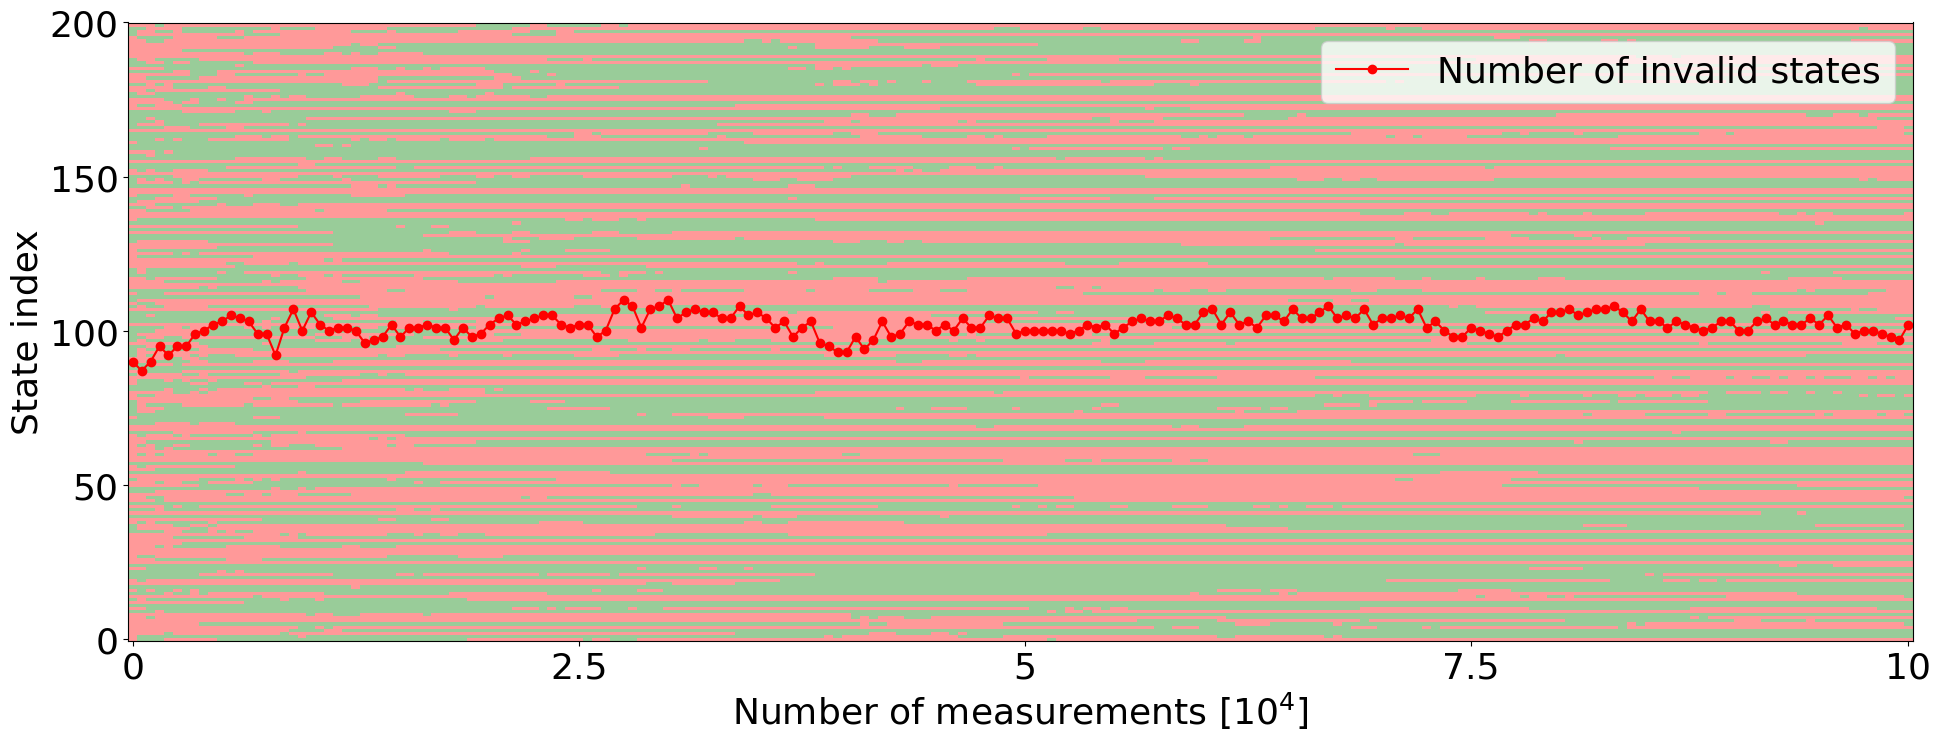

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from numpy.linalg import eigvals
#from tqdm import tqdm
from EMQST_lib import support_functions as sf
from EMQST_lib.povm import POVM
from EMQST_lib import measurement_functions as mf
plt.rcParams.update({'font.size': 26})

n_states = 200
n_qubits = 1
n_measurements_tot = 10**5
ticks = 200
n_shots = n_measurements_tot // ticks

def linear_inversion(outcomes, M):
    N = len(outcomes)
    n = np.array([np.sum(outcomes == i) for i in range(len(M))])
    p = n / N
    T = np.einsum('alk,bkl->ab', M, M)
    T_inv = np.linalg.inv(T)
    rho = np.einsum('i,ji,jnk->nk', p, T_inv, M)
    return rho

def is_physical(rho):
    if not np.allclose(rho, rho.conj().T): return False
    if not np.isclose(np.trace(rho), 1.0): return False
    if np.any(eigvals(rho) < -1e-8): return False
    return True

state_array = np.array([sf.generate_random_pure_state(1) for _ in range(n_states)])
M = POVM.generate_Pauli_POVM(1)
histograms = np.array([[M[i].get_histogram(state) for i in range(3)] for state in state_array])
pauli_6 = [M[i].get_POVM()/3 for i in range(3)]

povm = POVM(np.array([pauli_6[0][0],  pauli_6[1][0], pauli_6[2][ 0], pauli_6[2][1] + pauli_6[0][1]+ pauli_6[1][1]]))

combined_histograms = np.array([histogram.flatten()/3 for histogram in histograms])
#print(combined_histograms)
outcomes = [mf.measurement(n_measurements_tot,povm, rho) for rho in state_array]
valids = []
for i in range(ticks):
    
    recon_states = np.array([linear_inversion(outcome[:(i+1)*n_shots], povm.get_POVM()) for outcome in outcomes])

    valid = np.array([is_physical(rho) for rho in recon_states])
    valids.append(valid)



# --- Plotting ---
plt.figure(figsize=(20, 8))
#plt.title(f"Distribution of invalide one-qubit states")

# Heatmap
plt.imshow(np.array(valids).T, cmap=colors.ListedColormap(['red', 'green']), 
           vmin=0, vmax=1, alpha=0.4, aspect='auto')

# # Invalid count curve
height = np.sum(np.array(valids).T, axis=0)
plt.plot(height, 'o-', color='red', label='Number of invalid states')

# # Axes
plt.xlabel(r'Number of measurements [$10^4$]')
plt.ylabel(f'State index')
#plt.xscale('log')
plt.xticks([0,50,100,150,199],[0, 2.5, 5, 7.5, 10]) 
#plt.xlim(0, N_ticks - 1)
plt.ylim(-0.5, 200)
plt.legend()
plt.tight_layout()
plt.savefig('thesis_images/invalidity_distribution.pdf', bbox_inches='tight')
plt.show()



Found 1 folders
Folder 0: thesis_data/one_qubit_test/2025-11-07_14-38-07_5c075eda-61c5-4ad0-adaa-8e1bb8c0367f
Noise strengths: [0]
(1, 99999)
(99999,)
One qubit, p=0: adaptive fit parameters: [ 6.66839174 -0.99433085], non-adaptive fit parameters: [ 0.42897271 -0.47827537]


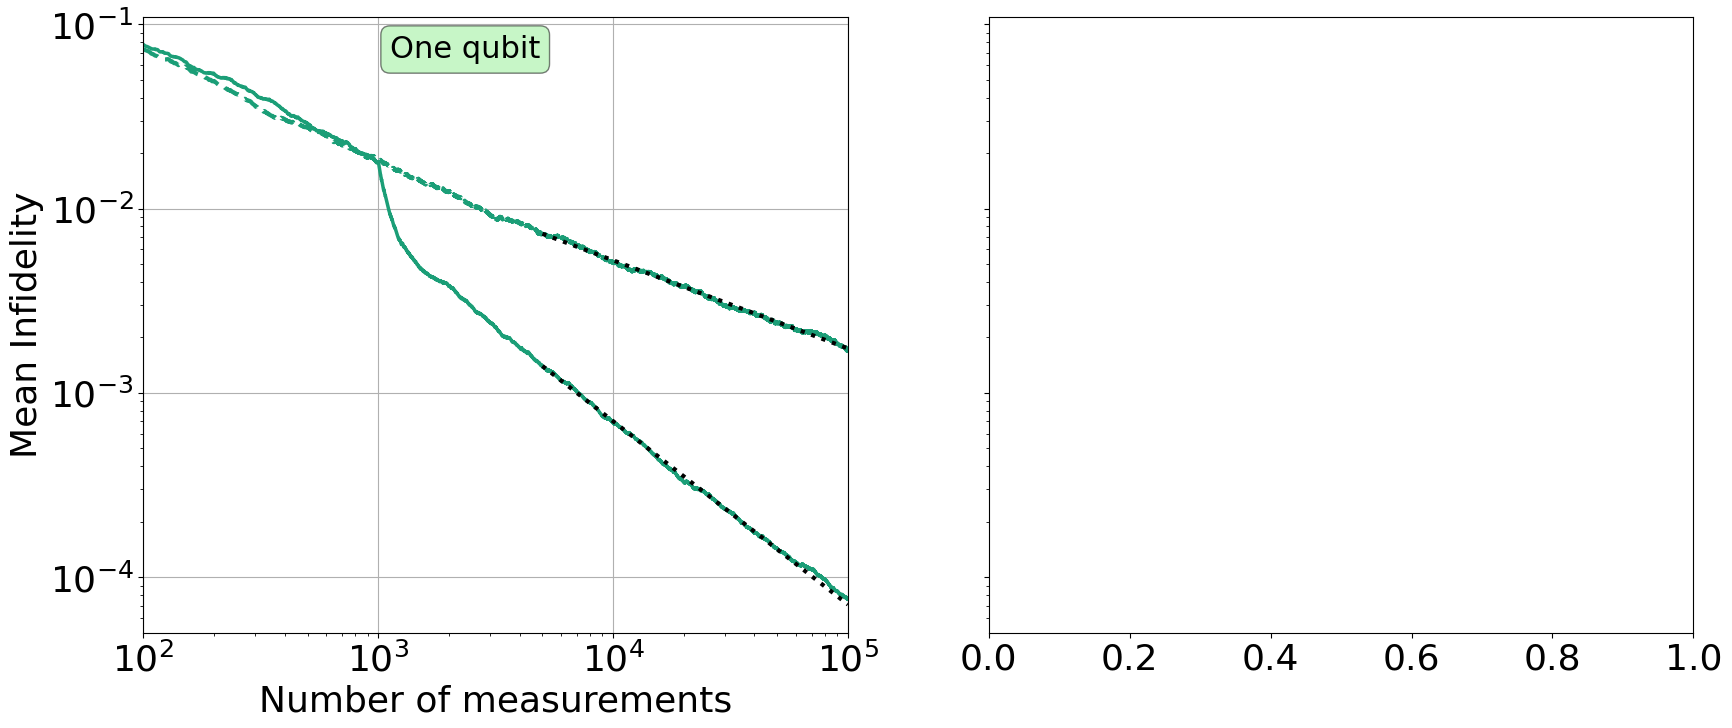

In [9]:
# Plotting for adaptive measurements as subplots
# Designed for half-page plots
import os
import glob
from matplotlib import colormaps
def power_law(x,a,b):
    return a*x**(b)

low_noise_path = 'thesis_data/one_qubit_test/'

low_noise_adaptive_inf_con = []
low_noise_nonadaptive_inf_con = []


#load_path = 'adaptive_results/one_qubit_100k_large_noise' #two_qubit_longtest'
glob_path = os.path.join(low_noise_path, '*.npy')
# Find all folders in subfolder
folders = [f for f in glob.glob(os.path.join(low_noise_path, "*")) if os.path.isdir(f)]
print(f'Found {len(folders)} folders')
for i, folder in enumerate(folders):
    print(f'Folder {i}: {folder}')
    with open(f'{folder}/infidelity_container.npy', 'rb') as f:
        infidelity_dict = np.load(f, allow_pickle=True).item()
    with open(f'{folder}/settings.npy', 'rb') as f:    
        low_noise_setting_array = np.load(f, allow_pickle=True)
    low_noise_adaptive_inf_con.append(infidelity_dict['adaptive_infidelity_container'])
    low_noise_nonadaptive_inf_con.append(infidelity_dict['nonadaptive_infidelity_container'])
    print(f'Noise strengths: {low_noise_setting_array[0]["noise_strengths"]}')
low_noise_noise_strengths = low_noise_setting_array[0]['noise_strengths']


# Assume mean_infidelities and labels are lists of lists/arrays, where each sublist corresponds to a subplot
# Example: mean_infidelities = [mean_infidelities_set1, mean_infidelities_set2]
#          labels = [labels_set1, labels_set2]


cutoff = 100
fitcutoff = 5000
#x = np.arange(len(infidelity_container1[0][0]))
#mean_infidelities = [np.mean(container, axis=1) for container in [infidelity_container1, infidelity_container2]]
colors = ['red', 'C1', 'C2', 'C4', 'red', 'C5', 'C6', 'C7', 'C8'] #  0 and 4 uses same colors as they are the same curve
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
plt.rcParams.update({'font.size': 26})

# Expect shape: (n_sheets, n_strengths, n_averages, n_points)
mean_low_noise_ada   = np.mean(low_noise_adaptive_inf_con, axis=(0,2))   # (n_strenghts, n_points,)
mean_low_noise_nonade  = np.mean(low_noise_nonadaptive_inf_con, axis=(0,2))   # (n_strenghts, n_points,)
print(mean_low_noise_ada.shape)
x = np.arange(mean_low_noise_ada.shape[1])
print(x.shape)
cmap        = colormaps['Dark2']
color_map_one_qubit   = {p: cmap(i) for i, p in enumerate(low_noise_noise_strengths)}

# --- styles ---
linestyles  = {'adaptive': '-', 'non-adaptive': '--'}
fit_style   = ':'  # dotted for fits
lw_ada      = 2.5
lw_nonada   = 3.0
ada_markersize = 8
nonada_markersize = 10
lw_fit      = 3.0
alpha_fit   = 0.9  # make 0.9 if you want it slightly subdued


for i, p in enumerate(low_noise_noise_strengths):
    color = color_map_one_qubit[p]

    # Plot adaptive (solid)
    line_ad, = axes[0].plot(
        x[cutoff:], mean_low_noise_ada[i, cutoff:],
        linestyle=linestyles['adaptive'],
        color=color, linewidth=lw_ada,
        label=f"Adaptive p={p:.2f}"
    )

    # Plot non-adaptive (dashed) 
    line_non, = axes[0].plot(
        x[cutoff:], mean_low_noise_nonade[i, cutoff:],
        linestyle='--', color=color, linewidth=lw_nonada
    )
    line_non.set_dashes([4, 2])  # 8 points on, 4 off — consistent on log scale

    # fits (on their own native x after fitcutoff)
    popt_ad,  _ = curve_fit(power_law, x[fitcutoff:],  mean_low_noise_ada[i,fitcutoff:],  p0=np.array([1.0, -0.5]))
    popt_non, _ = curve_fit(power_law, x[fitcutoff:], mean_low_noise_nonade[i,fitcutoff:], p0=np.array([1.0, -0.5]))
    #adaptive_exponent_fit.append(popt_ad[1])
    print(f'One qubit, p={p}: adaptive fit parameters: {popt_ad}, non-adaptive fit parameters: {popt_non}')
    axes[0].plot(x[fitcutoff:],  power_law(x[fitcutoff:],  *popt_ad),
            fit_style, color='k', linewidth=lw_fit)
    axes[0].plot(x[fitcutoff:], power_law(x[fitcutoff:], *popt_non),
           fit_style, color='k', linewidth=lw_fit)

box_props = dict(boxstyle='round', facecolor='lightgreen', alpha=0.5)
axes[0].text(0.35, 0.97, 'One qubit', transform=axes[0].transAxes, fontsize=22,
        verticalalignment='top', bbox=box_props)
axes[0].set_xlabel('Number of measurements')
axes[0].set_ylabel('Mean Infidelity')
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlim(cutoff, x[-1]+3)
axes[0].grid(True, alpha=1)


100 100


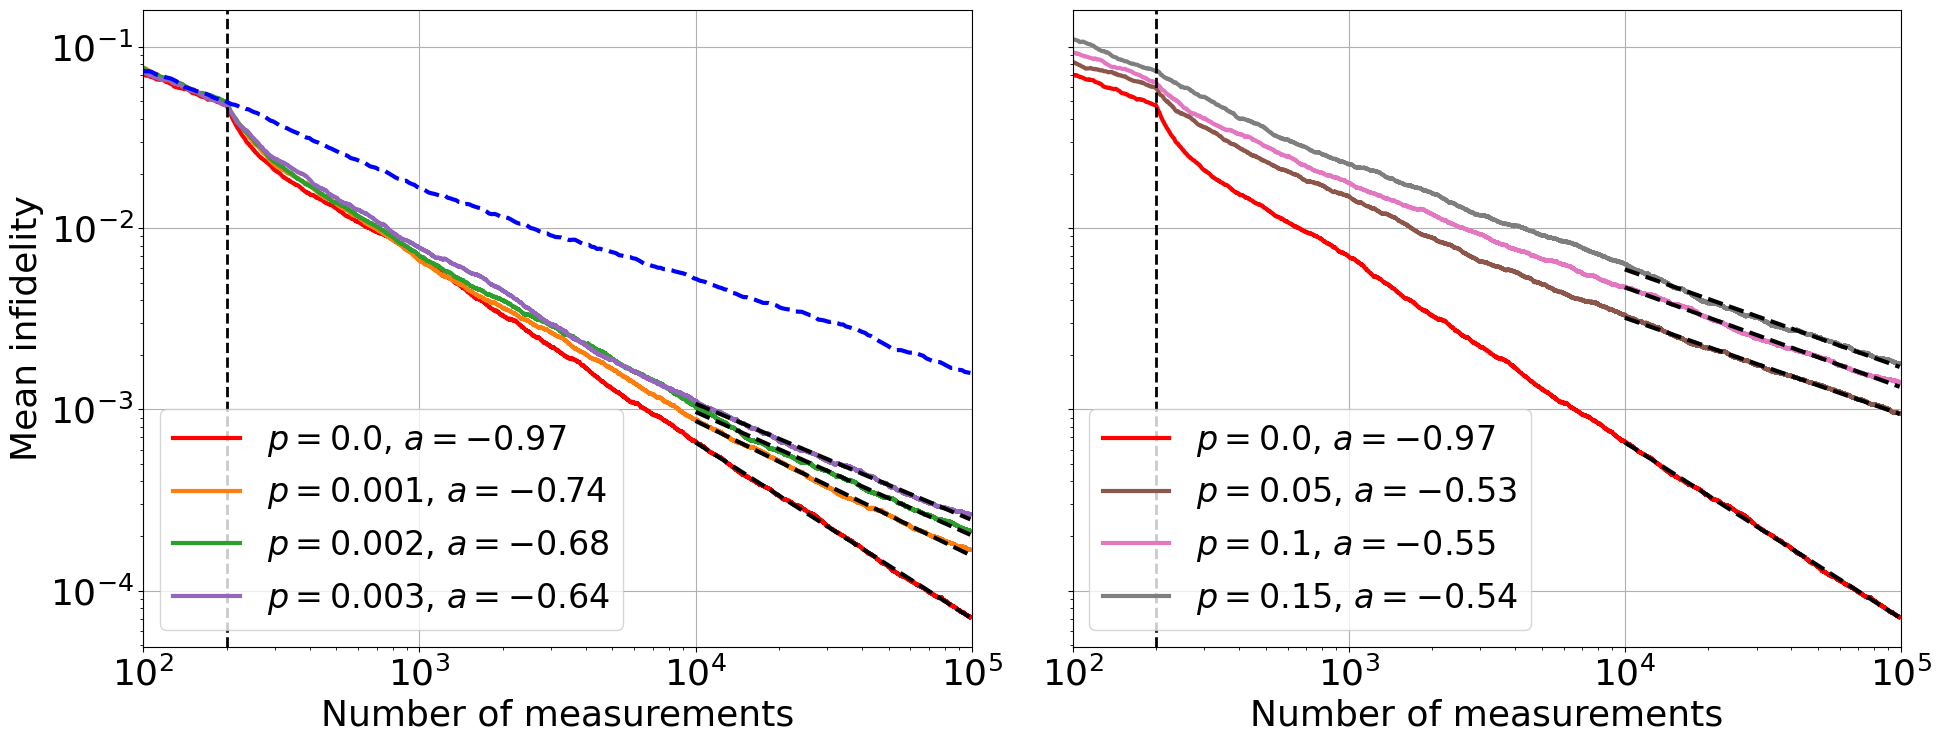

In [ ]:
path1 = 'thesis_data/one_qubit_thesis_low_noise/low_depol_noise/'
path2 = 'thesis_data/one_qubit_thesis_high_noise/high_depol_noise/'
infidelity_container1 = np.load(path1+"infidelity_container.npy", allow_pickle=True)
settings1 = np.load(path1+"settings.npy",allow_pickle=True).item()
infidelity_container2 = np.load(path2+"infidelity_container.npy", allow_pickle=True)
settings2 = np.load(path2+"settings.npy",allow_pickle=True).item()

# Load no-adaptive curve
path_no_adaptive = "Paper_results_and_notebooks/Optimal_state_tomogoraphy_scaling/adaptive_results/adaptive_comparson/thesis_data/"

no_adaptive_infidelity = np.load(path_no_adaptive+"infidelity_container.npy", allow_pickle=True)
no_adaptive_settings = np.load(path_no_adaptive+"settings.npy", allow_pickle=True)
mean_infidelities_no_adaptive = np.mean(no_adaptive_infidelity, axis=1)[0]
#print(infidelity_container)
plt.rcParams.update({'font.size': 26})
labels = [settings1['noise_strengths'], settings2['noise_strengths']] # Labels for the legend

print(len(infidelity_container1[0]), len(infidelity_container2[0]))

cutoff = 100
fitcutoff = 10000
x = np.arange(len(infidelity_container1[0][0]))
mean_infidelities = [np.mean(container, axis=1) for container in [infidelity_container1, infidelity_container2]]
colors = ['red', 'C1', 'C2', 'C4', 'red', 'C5', 'C6', 'C7', 'C8'] #  0 and 4 uses same colors as they are the same curve
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
plt.rcParams.update({'font.size': 26})


for idx, ax in enumerate(axes):
    for i in range(len(mean_infidelities[idx])):
       
        if idx == 0 and i == 0:
            popt, pcov = curve_fit(power_law, x[fitcutoff:], mean_infidelities[1][i][fitcutoff:], p0=np.array([1, -0.5]))
            infiFit = power_law(x[fitcutoff:], popt[0], popt[1])
            ax.plot(x[cutoff:], mean_infidelities[1][i][cutoff:], label=rf'$p={np.round(labels[0][i],3)}$, $a={"%.2f" % popt[1]}$' if labels else None, color=colors[i+1*len(mean_infidelities[0])], linewidth=3)
            ax.plot(x[fitcutoff:], infiFit, '--', color='k', linewidth=3)
            
        else:
            popt, pcov = curve_fit(power_law, x[fitcutoff:], mean_infidelities[idx][i][fitcutoff:], p0=np.array([1, -0.5]))
            infiFit = power_law(x[fitcutoff:], popt[0], popt[1])
            ax.plot(x[cutoff:], mean_infidelities[idx][i][cutoff:], label=rf'$p={np.round(labels[idx][i],3)}$, $a={"%.2f" % popt[1]}$' if labels else None, color=colors[i+idx*len(mean_infidelities[0])], linewidth=3)
            ax.plot(x[fitcutoff:], infiFit, '--', color='k', linewidth=3)

    ax.axvline(x=200, color='black', linestyle='--', linewidth=2 )
    ax.set_xlabel('Number of measurements')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(cutoff, 100000)
    ax.grid()
    
    ax.legend(loc= "lower left",fontsize=24)
    
    
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d

# Original data
x_raw = x[cutoff:]
y_raw = mean_infidelities_no_adaptive[cutoff:]

# 1. Interpolate data in log-log space
logx = np.log10(x_raw)
logy = np.log10(y_raw)

# Smooth y-values in log-space (optional)
#logy_smooth = gaussian_filter1d(logy, sigma=2)

# Interpolation function
interp_logy = interp1d(logx, logy, kind='linear')

# 2. Resample uniformly in log-space
logx_new = np.linspace(logx[0], logx[-1], 300)  # Uniform log-spacing
logy_new = interp_logy(logx_new)

# 3. Convert back to original scale
x_smooth = 10**logx_new
y_smooth = 10**logy_new
    
line, = axes[0].plot(
    x_smooth, 
    y_smooth, 
    label=rf'No-adaptive' if labels else None, 
    color='blue', 
    linewidth=3, linestyle='--'
)
#line.set_dashes([6, 4])  # Dash pattern: 6pt dash, 4pt gap
#line.set_dashes([10, 6])
#line.set_markevery(15)
axes[0].set_ylabel('Mean infidelity')

plt.tight_layout()
plt.savefig('thesis_images/infidelity_adaptive_subplot.pdf', bbox_inches='tight')
plt.show()




(2, 1, 50, 99999)
(10, 1, 10, 99999)


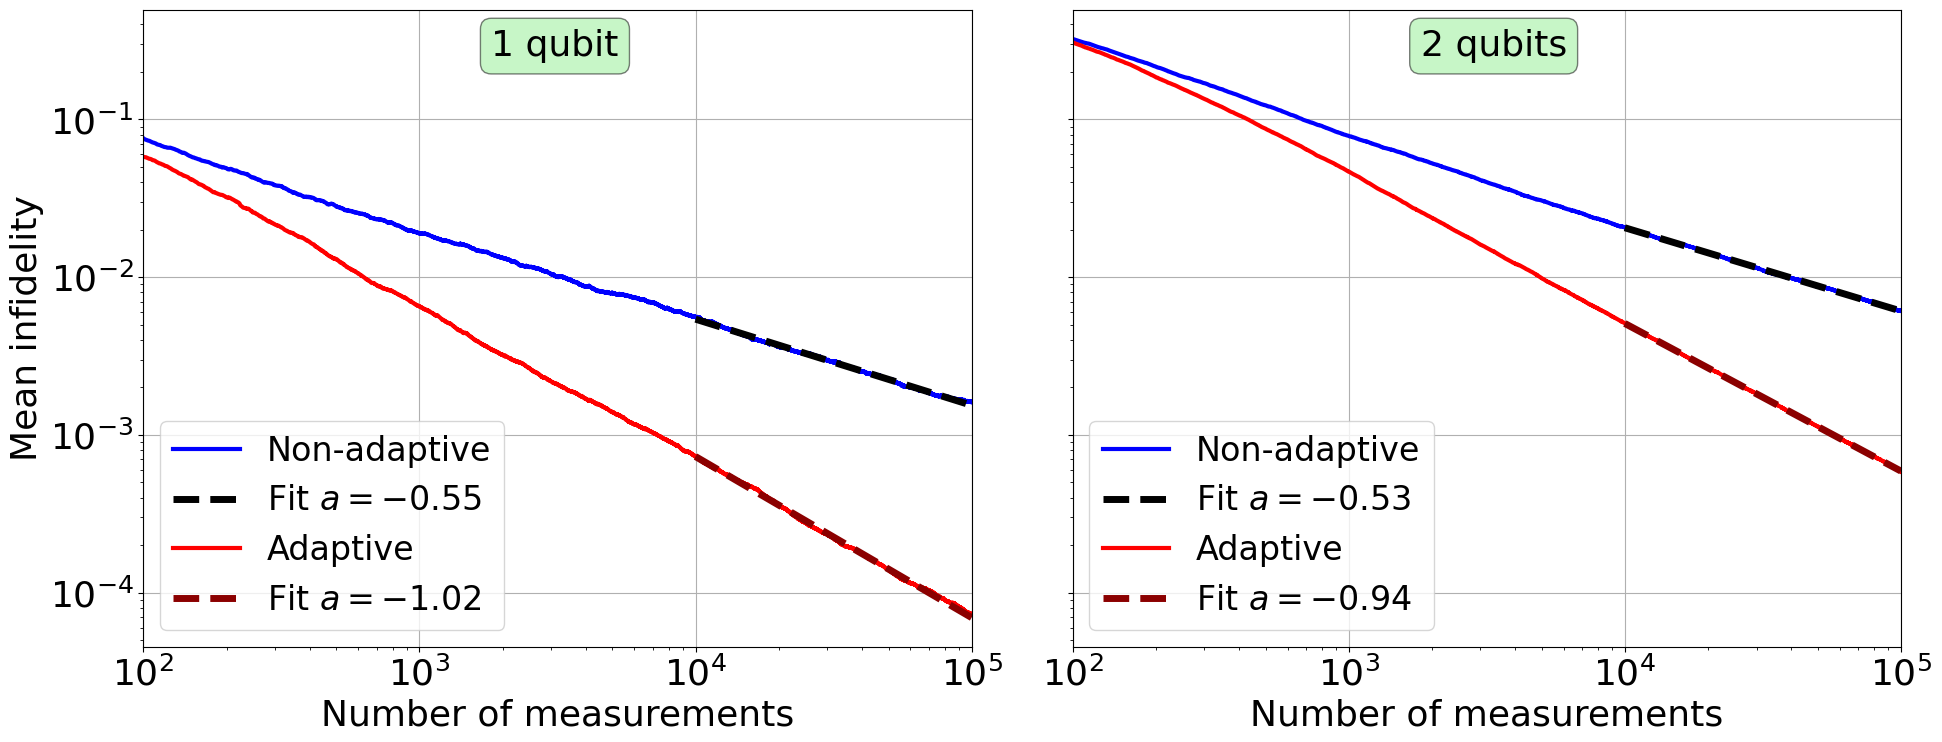

In [3]:
# Direct comparison non-adaptive and adaptive measurements
import glob
import os
def power_law(x,a,b):
    return a*x**(b)


cutoff = 100
fitcutoff = 10000
fit_lower_cutoff = 10000

path_one_qubit = "thesis_data/one_qubit_thesis"
#infidelity_container_one_qubit = np.load(path_one_qubit+"infidelity_container.npy", allow_pickle=True)
#settings = np.load(path_one_qubit+"settings.npy",allow_pickle=True).item()

adaptive_infidelity_container = []
nonadaptive_infidelity_container = []

folders = [f for f in glob.glob(os.path.join(path_one_qubit, "*")) if os.path.isdir(f)]
for i, folder in enumerate(folders):
        with open(f'{folder}/infidelity_container.npy', 'rb') as f:
            infidelity_dict = np.load(f, allow_pickle=True).item()
        with open(f'{folder}/settings.npy', 'rb') as f:    
            settings_one_qubit = np.load(f, allow_pickle=True).item()
        adaptive_infidelity_container.append(infidelity_dict['adaptive_infidelity_container'])
        nonadaptive_infidelity_container.append(infidelity_dict['nonadaptive_infidelity_container'])
adaptive_infidelity_container = np.array(adaptive_infidelity_container)
container_shape = adaptive_infidelity_container.shape
print(adaptive_infidelity_container.shape)
adaptive_infidelity_container = np.reshape(adaptive_infidelity_container, (container_shape[0]*container_shape[2], -1))
mean_infidelities_adaptive = np.mean(adaptive_infidelity_container, axis=0)

nonadaptive_infidelity_container = np.array(nonadaptive_infidelity_container)
container_shape = nonadaptive_infidelity_container.shape
nonadaptive_infidelity_container = np.reshape(nonadaptive_infidelity_container, (container_shape[0]*container_shape[2], -1))
mean_infidelities_nonadaptive = np.mean(nonadaptive_infidelity_container, axis=0)





x = np.arange(len(mean_infidelities_adaptive))



# x = np.arange(len(infidelity_container_one_qubit[0][0]))
# mean_infidelities = [np.mean(container, axis=0) for container in [infidelity_container_one_qubit[0], infidelity_container_one_qubit[1]]]

#print(mean_infidelities)
#colors = ['red', 'C1', 'C2', 'C4', 'red', 'C5', 'C6', 'C7', 'C8'] #  0 and 4 uses same colors as they are the same curve
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
plt.rcParams.update({'font.size': 26})

ax_1 = axes[0]
ax_2 = axes[1]


ax_1.plot(x[cutoff:], mean_infidelities_nonadaptive[cutoff:], label='Non-adaptive', color='blue', linewidth=3)
popt1, pcov1 = curve_fit(power_law, x[fitcutoff:], mean_infidelities_nonadaptive[fitcutoff:], p0=np.array([1, -0.5]))
infiFit1 = power_law(x[fit_lower_cutoff:], popt1[0], popt1[1])
ax_1.plot(x[fit_lower_cutoff:], infiFit1, color='k', linestyle = '--', linewidth=5, label=rf'Fit $a={"%.2f" % popt1[1]}$')
ax_1.plot(x[cutoff:], mean_infidelities_adaptive[cutoff:], label='Adaptive', color='red', linewidth=3)

popt2, pcov2 = curve_fit(power_law, x[fitcutoff:], mean_infidelities_adaptive[fitcutoff:], p0=np.array([1, -0.5]))
infiFit2 = power_law(x[fit_lower_cutoff:], popt2[0], popt2[1])
ax_1.plot(x[fit_lower_cutoff:], infiFit2, color='darkred', linestyle='--', linewidth=5, label=rf'Fit $a={"%.2f" % popt2[1]}$')
#ax_1.axvline(x=200, color='black', linestyle='--', linewidth=2)



adaptive_infidelity_container = []
nonadaptive_infidelity_container = []

path_two_qubits = "thesis_data/two_qubit_infidelities"
folders = [f for f in glob.glob(os.path.join(path_two_qubits, "*")) if os.path.isdir(f)]
for i, folder in enumerate(folders):
        with open(f'{folder}/infidelity_container.npy', 'rb') as f:
            infidelity_dict = np.load(f, allow_pickle=True).item()
        with open(f'{folder}/settings.npy', 'rb') as f:    
            settings_two_qubit = np.load(f, allow_pickle=True).item()
        adaptive_infidelity_container.append(infidelity_dict['adaptive_infidelity_container'])
        nonadaptive_infidelity_container.append(infidelity_dict['nonadaptive_infidelity_container'])
adaptive_infidelity_container = np.array(adaptive_infidelity_container)
container_shape = adaptive_infidelity_container.shape
print(adaptive_infidelity_container.shape)
adaptive_infidelity_container = np.reshape(adaptive_infidelity_container, (container_shape[0]*container_shape[2], -1))
mean_infidelities_adaptive = np.mean(adaptive_infidelity_container, axis=0)

nonadaptive_infidelity_container = np.array(nonadaptive_infidelity_container)
container_shape = nonadaptive_infidelity_container.shape
nonadaptive_infidelity_container = np.reshape(nonadaptive_infidelity_container, (container_shape[0]*container_shape[2], -1))
mean_infidelities_nonadaptive = np.mean(nonadaptive_infidelity_container, axis=0)





x = np.arange(len(mean_infidelities_adaptive))


ax_2.plot(x[cutoff:], mean_infidelities_nonadaptive[cutoff:], label='Non-adaptive', color='blue', linewidth=3)
popt1, pcov1 = curve_fit(power_law, x[fitcutoff:], mean_infidelities_nonadaptive[fitcutoff:], p0=np.array([1, -0.5]))
infiFit1 = power_law(x[fit_lower_cutoff:], popt1[0], popt1[1])
ax_2.plot(x[fit_lower_cutoff:], infiFit1, color='k', linestyle = '--', linewidth=5, label=rf'Fit $a={"%.2f" % popt1[1]}$')
ax_2.plot(x[cutoff:], mean_infidelities_adaptive[cutoff:], label='Adaptive', color='red', linewidth=3)

popt2, pcov2 = curve_fit(power_law, x[fitcutoff:], mean_infidelities_adaptive[fitcutoff:], p0=np.array([1, -0.5]))
infiFit2 = power_law(x[fit_lower_cutoff:], popt2[0], popt2[1])
ax_2.plot(x[fit_lower_cutoff:], infiFit2, color='darkred', linestyle='--', linewidth=5, label=rf'Fit $a={"%.2f" % popt2[1]}$')
#ax_2.axvline(x=200, color='black', linestyle='--', linewidth=2)

ax_1.set_ylabel('Mean infidelity')
labels = ['1 qubit', '2 qubits']
for j, ax in enumerate(axes):
    #ax.axvline(x=200, color='black', linestyle='--', linewidth=2 )
    ax.set_xlabel('Number of measurements')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(cutoff, 100000)
    textstr = f"{labels[j]}"
    props = dict(boxstyle='round', facecolor='lightgreen', alpha=0.5)
    ax.text(0.42, 0.97, textstr, transform=ax.transAxes, fontsize=26,
            verticalalignment='top', bbox=props)
    ax.legend(fontsize=24, loc='lower left')
    ax.grid()


fig.tight_layout()
fig.savefig('thesis_images/infidelity_adaptive_comparison.pdf', bbox_inches='tight')

Found 41 folders
Folder 0: thesis_data/one_qubit_100k/2025-10-17_23-32-05_31a2ced7-9c12-40d8-bb62-a28cc6d7138c
Folder 1: thesis_data/one_qubit_100k/2025-10-17_23-32-05_58b08872-81b5-4358-af40-d8460c018392
Folder 2: thesis_data/one_qubit_100k/2025-10-17_23-32-05_78d72a60-21f4-4d30-bc38-033ac8c314ea
Folder 3: thesis_data/one_qubit_100k/2025-10-19_17-28-22_9ac673a0-a247-4f7a-8b8f-f9901e0a66cf
Folder 4: thesis_data/one_qubit_100k/2025-10-19_18-02-53_8174d289-5c9e-43ec-b512-7ab1a7de798f
Folder 5: thesis_data/one_qubit_100k/2025-10-19_18-37-55_834a5b7b-7fc6-409f-b299-a912fe8e8a66
Folder 6: thesis_data/one_qubit_100k/2025-10-19_19-13-58_eb6f04a5-d426-4c72-8d73-78ad6f171ca3
Folder 7: thesis_data/one_qubit_100k/2025-10-19_19-15-44_d6cc716b-1a10-498e-99e9-c81bbb023ae5
Folder 8: thesis_data/one_qubit_100k/2025-10-19_19-15-44_e14a35d5-2f5e-48cc-aeba-04829e472bf9
Folder 9: thesis_data/one_qubit_100k/2025-10-19_19-16-27_6e00f981-ecc0-4424-8cfd-3a9c8484a437
Folder 10: thesis_data/one_qubit_100k/2025-

/tmp/ipykernel_26196/4281364484.py:158: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


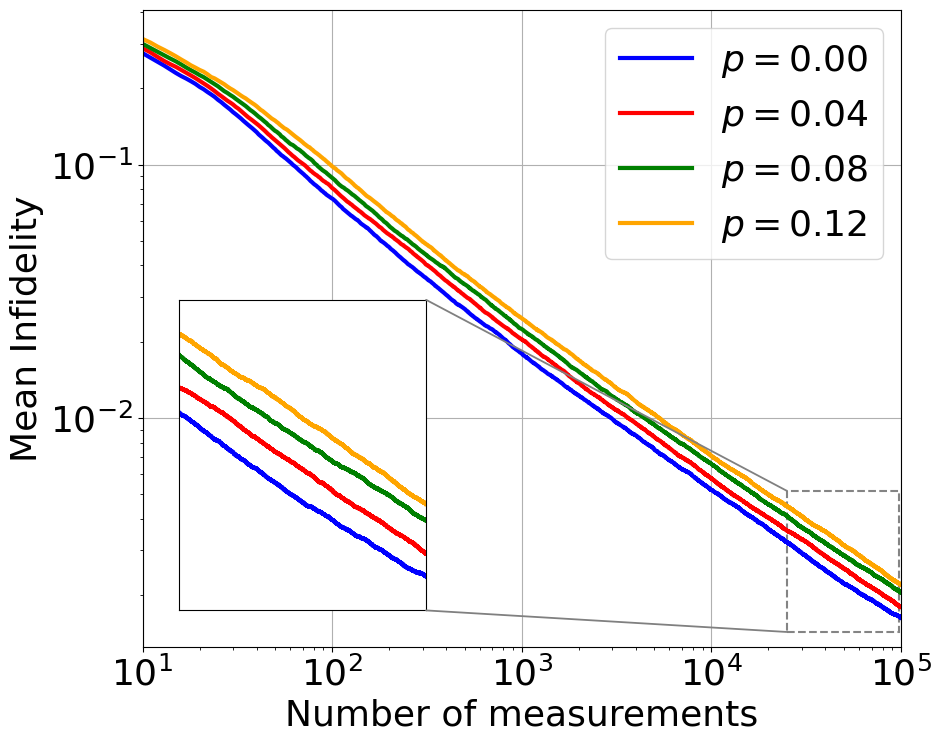

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

from matplotlib.patches import Rectangle, ConnectionPatch
from matplotlib import colormaps
import os
import uuid
import glob

one_qubit_nonadaptive_inf_con = []

load_path = 'thesis_data/one_qubit_100k' #two_qubit_longtest'
glob_path = os.path.join(load_path, '*.npy')
# Find all folders in subfolder
folders = [f for f in glob.glob(os.path.join(load_path, "*")) if os.path.isdir(f)]
print(f'Found {len(folders)} folders')
for i, folder in enumerate(folders):
    print(f'Folder {i}: {folder}')
    with open(f'{folder}/infidelity_container.npy', 'rb') as f:
        infidelity_dict = np.load(f, allow_pickle=True).item()
    with open(f'{folder}/settings.npy', 'rb') as f:    
        one_qubit_setting_array = np.load(f, allow_pickle=True)
    one_qubit_nonadaptive_inf_con.append(infidelity_dict['nonadaptive_infidelity_container'])
one_qubit_noise_strengths = one_qubit_setting_array[0]['noise_strengths']

one_qubit_settings = one_qubit_setting_array[0]
adaptive_burnin = one_qubit_settings['adaptive_burnin']
one_qubit_noise_strengths = one_qubit_settings['noise_strengths']


# ----------------------------
# Setup: figure and main axes
# ----------------------------
fig, axes = plt.subplots(1, 1, figsize=(10, 8))

# Your data assumptions
# one_qubit_nonadaptive_inf_con: shape (n_strengths, n_averages, n_points)
# one_qubit_noise_strengths: iterable of noise strengths (len = n_strengths)
mean_one_qubit_nonade = np.mean(one_qubit_nonadaptive_inf_con, axis=(0, 2))  # (n_strengths, n_points)
x_one_qubit = np.arange(np.shape(one_qubit_nonadaptive_inf_con)[-1])
cutoff = 10

# Colors
cmap = ['blue','red','green','orange','purple','brown','pink','gray','olive','cyan']

color_map_one_qubit = {
    p: cmap[i]
    for i, p in enumerate(one_qubit_noise_strengths)
}
lw_nonada = 3.0

# ----------------------------
# Main panel: curves
# ----------------------------
for i, p in enumerate(one_qubit_noise_strengths):
    axes.plot(
        x_one_qubit[cutoff:],
        mean_one_qubit_nonade[i, cutoff:],
        color=color_map_one_qubit[p],
        linewidth=lw_nonada,
        label=rf"$p={p:.2f}$"
    )

axes.set_xlabel('Number of measurements')
axes.set_ylabel('Mean Infidelity')
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlim(cutoff, x_one_qubit[-1] + 3)
axes.grid(True, alpha=1)
axes.legend()

# ------------------------------------------
# Choose a WIDER x-window for the zoom box
# ------------------------------------------
n = len(x_one_qubit)
x0 = max(cutoff, int(0.25 * n))
x1 = min(int(0.98 * n), n - 1)
xs0, xs1 = x_one_qubit[x0], x_one_qubit[x1]

# Compute y-lims in that window (avoid zeros for log)
window_vals = mean_one_qubit_nonade[:, x0:x1 + 1]
pos_vals = window_vals[window_vals > 0]
ymin = np.nanmin(pos_vals)
ymax = np.nanmax(pos_vals)
pad_lo, pad_hi = 1.15, 1.15
ymin_box, ymax_box = ymin / pad_lo, ymax * pad_hi

# ------------------------------------------
# Draw the zoom rectangle on the RIGHT side
# ------------------------------------------
rect = Rectangle(
    (xs0, ymin_box),
    xs1 - xs0,
    ymax_box - ymin_box,
    fill=False,
    color="0.4",
    linestyle="--",
    linewidth=1.5,
    alpha=0.8
)
axes.add_patch(rect)

# ------------------------------------------
# Inset: move it further RIGHT + make wider
# ------------------------------------------
# Start as an inset (keeps shared transforms), then reposition
axins = zoomed_inset_axes(axes, zoom=2.2, loc="lower left", borderpad=1.0)

# Plot same curves in inset
for i, p in enumerate(one_qubit_noise_strengths):
    axins.plot(
        x_one_qubit[cutoff:],
        mean_one_qubit_nonade[i, cutoff:],
        color=color_map_one_qubit[p],
        linewidth=lw_nonada
    )

# Log scales + limits match the zoom box
axins.set_xscale('log')
axins.set_yscale('log')
axins.set_xlim(xs0, xs1)
axins.set_ylim(ymin_box, ymax_box)
axins.grid(True, alpha=0.6)
axins.get_yaxis().set_visible(False)
axins.get_xaxis().set_visible(False)

# Hide tick labels (keep ticks)
axins.tick_params(labelleft=False, labelbottom=False)

# Reposition the inset further to the RIGHT and make it a bit wider
# Use figure-relative coordinates to push it past the main axes.
main_pos = axes.get_position()  # [x0, y0, width, height] in figure coords
axins_pos = axins.get_position()
# Place the inset starting a bit to the right of the main axes right edge
new_x0 = main_pos.x1 + 0.02
new_y0 = main_pos.y0 + 0.05 * main_pos.height
new_w  = axins_pos.width * 1.25   # a bit wider
new_h  = axins_pos.height         # keep height (adjust if you like)
axins.set_position([new_x0, new_y0, new_w, new_h])

# ------------------------------------------
# Manual connectors: LEFT edge of rect -> RIGHT edge of inset (top & bottom)
# ------------------------------------------
con_top = ConnectionPatch(
    xyA=(xs0, ymax_box), coordsA=axes.transData,              # left-top corner of rectangle
    xyB=(axins.get_xlim()[1], axins.get_ylim()[1]), coordsB=axins.transData,  # right-top of inset
    color="0.5", linewidth=1.3
)
con_bot = ConnectionPatch(
    xyA=(xs0, ymin_box), coordsA=axes.transData,              # left-bottom corner of rectangle
    xyB=(axins.get_xlim()[1], axins.get_ylim()[0]), coordsB=axins.transData,  # right-bottom of inset
    color="0.5", linewidth=1.3
)
fig.add_artist(con_top)
fig.add_artist(con_bot)

plt.tight_layout()
fig.savefig("thesis_images/bias-variance-tradeoff.pdf")
plt.show()
